In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import linear_model
file_path = "C:/CEPS.csv"

matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [8]:
# read CEPS.csv file
all_data = pd.read_csv('CEPS.csv',encoding='gb2312', low_memory=False)
all_data.head()

,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [9]:
height_mean_list= []
weight_mean_list = []
for i in range(30):
    # randomly selected 1000 line
    selected_data = all_data.sample(n=1000)

    # we choose current height and weight to research
    height = selected_data['a13']
    height_list = []
    for data in height:
        if data != " ":
            height_list.append(float(data))

    weight = selected_data['a14']
    weight_list = []
    for data in weight:
        if data != " ":
            weight_list.append(float(data))        

    height_mean_list.append(np.array(height_list).mean())
    weight_mean_list.append(np.array(weight_list).mean())

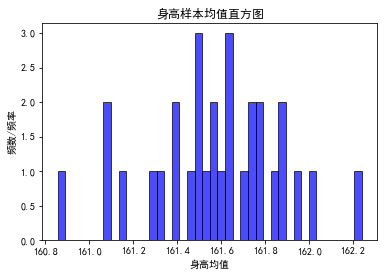

In [11]:
plt.hist(height_mean_list, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("身高均值")
plt.ylabel("频数/频率")
plt.title("身高样本均值直方图")
plt.show()

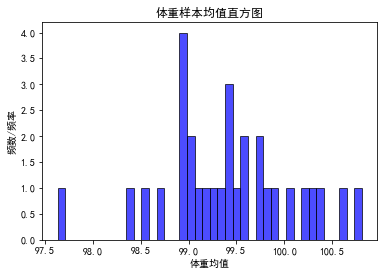

In [12]:
plt.hist(weight_mean_list, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("体重均值")
plt.ylabel("频数/频率")
plt.title("体重样本均值直方图")
plt.show()

In [14]:
print("身高样本均值的均值: {} 身高样本均值的标准差: {}".format(np.array(height_mean_list).mean(), np.array(height_mean_list).std()))
print("体重样本均值的均值: {} 体重样本均值的标准差: {}".format(np.array(weight_mean_list).mean(), np.array(weight_mean_list).std()))     

身高样本均值的均值: 161.5752008177873 身高样本均值的标准差: 0.2937458434707565
体重样本均值的均值: 99.41380696236571 体重样本均值的标准差: 0.6710861569814577


In [38]:
# we will build a linner regression model to fix studnet's score, family income, parents' expect and computer status
score = all_data['c12']
income = all_data['b09']
expect = all_data['b30']
computer = all_data['b13']

score_list = []
income_list = []
expect_list =[]
computer_list = []
for i in range(len(score)):
    if score[i] != " " and income[i] != " " and expect[i] != " " and computer[i] != " ":
        score_list.append(float(score[i]))
        income_list.append(float(income[i]))
        expect_list.append(float(expect[i]))
        computer_list.append(float(computer[i]))
x_data = pd.DataFrame({
    'income': income_list,
    'expect': expect_list,
    'computer': computer_list
})
y_data = pd.DataFrame({
    'score': score_list
})

In [39]:
model = linear_model.LinearRegression()
model.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# print(model.coef_)
# print(model.intercept_)
print("the model is score = {} * income {} * expect + {} * computer + {}".format(model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.intercept_[0]))
print("model r2 score: {}".format(model.score(x_data, y_data)))

the model is score = 0.15751258758601 * income -0.6185777616999556 * expect + 0.05183365094425203 * computer + 3.8666547314865944
model r2 score: 0.2631057815901966


显然，学生的学业成绩与家庭收入有弱正相关，与父母的期待程度有较强的正相关，与家里是否有电脑和网络基本没有关系
因此，若父母需要提高学生的成绩，最直接的方式是可以提高对孩子的成绩期望，没有必要限制电脑和网络使用。

当然，本模型的拟合程度不算太高，r2 成绩只有0.26，可能缺乏一定的说服力